
# predict house price using the Keras deep learning library and Google colab.

Code by Marian Nader 

In [158]:
#  import libraries 
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
import keras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [159]:
# data = keras.datasets.boston_housing.load_data()

In [160]:
# import data
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
) 


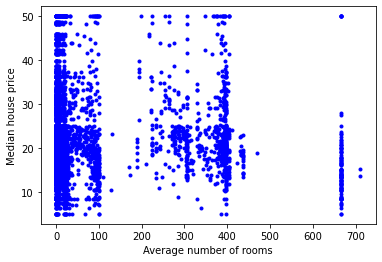

In [161]:
# Plot the train_data
plt.plot(train_data, train_targets, 'b.')
plt.xlabel('Average number of rooms')
plt.ylabel('Median house price')
plt.show()

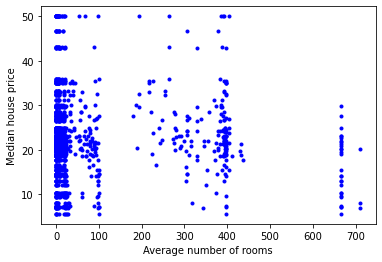

In [162]:
# Plot the test_data
plt.plot(test_data, test_targets, 'b.')
plt.xlabel('Average number of rooms')
plt.ylabel('Median house price')
plt.show()

In [163]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))


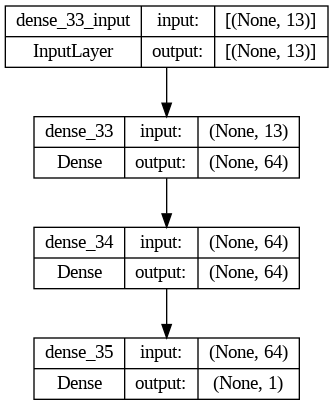

In [164]:
#  plot the model 
from keras.utils import plot_model
keras.utils.plot_model(model, show_shapes=True)


In [165]:
# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [166]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                896       
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


In [167]:
# Train the model
model.fit(train_data, train_targets, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
404/404 - 1s - loss: 188.4507 - mae: 10.0367 - 1s/epoch - 3ms/step
Epoch 2/50
404/404 - 1s - loss: 109.9375 - mae: 7.8622 - 644ms/epoch - 2ms/step
Epoch 3/50
404/404 - 1s - loss: 89.1074 - mae: 6.9050 - 627ms/epoch - 2ms/step
Epoch 4/50
404/404 - 1s - loss: 81.3899 - mae: 6.7389 - 672ms/epoch - 2ms/step
Epoch 5/50
404/404 - 1s - loss: 67.7099 - mae: 6.1604 - 699ms/epoch - 2ms/step
Epoch 6/50
404/404 - 1s - loss: 64.5545 - mae: 5.7769 - 671ms/epoch - 2ms/step
Epoch 7/50
404/404 - 1s - loss: 56.3644 - mae: 5.3476 - 687ms/epoch - 2ms/step
Epoch 8/50
404/404 - 1s - loss: 51.4432 - mae: 5.2212 - 666ms/epoch - 2ms/step
Epoch 9/50
404/404 - 1s - loss: 50.3900 - mae: 5.2259 - 618ms/epoch - 2ms/step
Epoch 10/50
404/404 - 1s - loss: 48.4473 - mae: 4.9880 - 631ms/epoch - 2ms/step
Epoch 11/50
404/404 - 1s - loss: 43.8258 - mae: 4.8131 - 690ms/epoch - 2ms/step
Epoch 12/50
404/404 - 1s - loss: 43.9013 - mae: 4.8822 - 672ms/epoch - 2ms/step
Epoch 13/50
404/404 - 1s - loss: 42.8600 - mae: 4

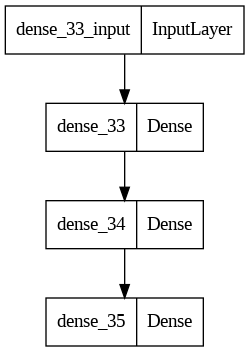

In [168]:
from keras.utils import plot_model
plot_model(model, to_file="model.png")

In [169]:
# Make predictions on the test set
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 31.4885 - mae: 3.8631


In [170]:
print('Mean squared error on test data: ', test_mse_score)
print('Mean absolute error on test data: ', test_mae_score)

Mean squared error on test data:  31.48850440979004
Mean absolute error on test data:  3.8631155490875244


In [171]:
weights = model.get_weights()
intercept = weights[0][0]
print(intercept)

[-0.07802324 -0.2288     -0.09099258 -0.1513073  -0.1061355  -0.04888594
 -0.23227802  0.17835104 -0.29374558 -0.33292586 -0.0392192  -0.1554435
  0.24267092 -0.12392911  0.08299135 -0.16724987 -0.15158187 -0.23675872
  0.09578666  0.03832571  0.10184135 -0.00549343  0.15964033 -0.18302612
 -0.80433434 -0.35965276  0.60810757  0.12680408  0.24387987  0.05103263
  0.15619116  0.21099068 -0.01701194  0.01853028  0.09155581 -0.3429836
 -0.09521084  0.03480516  0.18133244 -0.0562429   0.15081918  0.19265997
  0.02446964 -0.1264364  -0.02548972 -0.36809105 -0.21779007  0.24369207
  0.11884477 -0.32414415  0.07131955  0.00721964  0.00648636 -0.14854737
 -0.01237857 -0.13626894  0.36672908 -0.03228353 -0.48264202 -0.08793095
 -0.22712186  0.12487666 -0.1861979  -0.31739074]


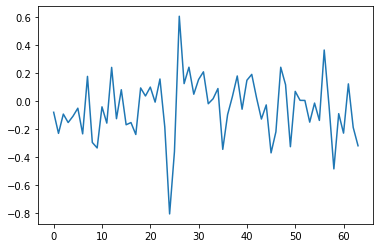

In [172]:
# Plot the intercept
plt.plot(intercept)
plt.show()